# Support Vector Machine

# Online News Popularity

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [31]:
data = pd.read_csv("onlineNewsPopularity.csv")

In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


In [33]:
if(data.columns.contains("url")):
    data = data.drop(["url"," timedelta"],1)

In [34]:
data.head().T

,0,1,2,3,4
n_tokens_title,12.000000,9.000000,9.000000,9.000000,13.000000
n_tokens_content,219.000000,255.000000,211.000000,531.000000,1072.000000
n_unique_tokens,0.663594,0.604743,0.575130,0.503788,0.415646
n_non_stop_words,1.000000,1.000000,1.000000,1.000000,1.000000
n_non_stop_unique_tokens,0.815385,0.791946,0.663866,0.665635,0.540890
num_hrefs,4.000000,3.000000,3.000000,9.000000,19.000000
num_self_hrefs,2.000000,1.000000,1.000000,0.000000,19.000000
num_imgs,1.000000,1.000000,1.000000,1.000000,20.000000
num_videos,0.000000,0.000000,0.000000,0.000000,0.000000
average_token_length,4.680365,4.913725,4.393365,4.404896,4.682836


In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000
average_token_length,39644.0,4.548239,0.844406,0.00000,4.478404,4.664082,4.854839,8.041534


In [36]:
#data[' data_channel_is_lifestyle']=pd.Categorical(data[' data_channel_is_lifestyle']) 
#data[' data_channel_is_entertainment']=pd.Categorical(data[' data_channel_is_entertainment']) 
#data[' data_channel_is_bus']=pd.Categorical(data[' data_channel_is_bus']) 
#data[' data_channel_is_socmed']=pd.Categorical(data[' data_channel_is_socmed']) 
#data[' data_channel_is_tech']=pd.Categorical(data[' data_channel_is_tech']) 


#data[' weekday_is_monday']=pd.Categorical(data[' weekday_is_monday']) 
#data[' weekday_is_tuesday']=pd.Categorical(data[' weekday_is_tuesday']) 
#data[' weekday_is_wednesday']=pd.Categorical(data[' weekday_is_wednesday']) 
#data[' weekday_is_thursday']=pd.Categorical(data[' weekday_is_thursday']) 
#data[' weekday_is_friday']=pd.Categorical(data[' weekday_is_friday']) 
#data[' weekday_is_saturday']=pd.Categorical(data[' weekday_is_saturday']) 

# drop

data = data.drop([" data_channel_is_world"," weekday_is_sunday"," is_weekend"," rate_negative_words"," LDA_04"],1)

In [37]:
data.shape

(39644, 54)

In [38]:
median = data[' shares'].median()
data[' shares'] = np.where(data[' shares']>=median, 1, 0)

# 1: represents Large
# 0: represents Small


In [39]:

cols = data.shape[1]

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:cols-1], data.iloc[:,cols-1:cols], test_size=0.3, random_state=0)

# obtain scalers and perform scaling, including the test sets
#scalerX = preprocessing.StandardScaler().fit(X_train._get_numeric_data().columns)

#X_train_scaled = scalerX.transform(X_train)
#X_test_scaled = scalerX.transform(X_test)
#y_train = np.matrix(y_train.values)
#y_test = np.matrix(y_test.values)



In [40]:
#linear_svm = svm.SVC(kernel='linear', C=0.1)
#linear_svm.fit(X_train, y_train)

# LINEAR KERNEL

In [41]:
kernelTime = [None]*2

In [42]:
import time

start = time.time()

clf = svm.LinearSVC()
clf.fit(X_train,y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))


end = time.time()
kernelTime[0] =(end - start)

Train accuracy = 48.86%
Test accuracy = 49.17%

 Confusion Matrix: 

[[4286 1299]
 [4747 1562]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.47      0.77      0.59      5585
          1       0.55      0.25      0.34      6309

avg / total       0.51      0.49      0.46     11894



# SIGMOID KERNEL

In [43]:
start = time.time()

clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

end = time.time()
kernelTime[1] =(end - start)

Train accuracy = 53.5%
Test accuracy = 53.04%

 Confusion Matrix: 

[[   0 5585]
 [   0 6309]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      5585
          1       0.53      1.00      0.69      6309

avg / total       0.28      0.53      0.37     11894



Text(0.5,1,'Performace of various kernels')

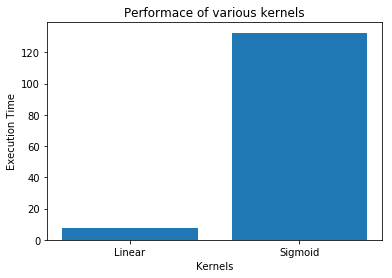

In [44]:
var = ['Linear','Sigmoid']
plt.bar(var,kernelTime)
plt.xlabel("Kernels")
plt.ylabel("Execution Time")
plt.title("Performace of various kernels")

# Now we will optimize sigmoid and find the best C and gamma value but we will use PCA , because number of features are too much, it is very slow

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [47]:
start = time.time()

clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))
end = time.time()
kernelTime[0] =(end - start)

Train accuracy = 50.58%
Test accuracy = 51.1%

 Confusion Matrix: 

[[2674 2911]
 [2905 3404]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.48      0.48      0.48      5585
          1       0.54      0.54      0.54      6309

avg / total       0.51      0.51      0.51     11894



# but not able to make any significant growth

In [51]:
from sklearn.svm import SVC
            
best_score = 0
for c in [0.1, 1, 10, 100, 1000]:
    for gamma in [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5]:
        
        svc = SVC(kernel='sigmoid', C=c, gamma=gamma)

        svc.fit(X_train, y_train) 

        score = svc.score(X_test, y_test)
        if score > best_score:
            finalC = c
            finalGamma = gamma
            best_score = score
            print ("Score:", score, "C= ", c, "gamma = ", gamma)

Score: 0.510929880612 C=  0.1 gamma =  0.0001
Score: 0.511013956617 C=  1 gamma =  0.0001


In [52]:
clf = svm.SVC(kernel='sigmoid',C=finalC,gamma=finalGamma)
clf.fit(X_train, y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

Train accuracy = 50.58%
Test accuracy = 51.1%

 Confusion Matrix: 

[[2674 2911]
 [2905 3404]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.48      0.48      0.48      5585
          1       0.54      0.54      0.54      6309

avg / total       0.51      0.51      0.51     11894

